In [2]:
import warnings 
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import matplotlib


In [18]:
furniture = pd.read_csv("Super_Store.csv", encoding = "cp1252")

In [19]:
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [20]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [21]:
furniture.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [22]:
cols = ['Row ID', 'Order ID','Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit']

In [23]:
furniture.drop(cols, axis = 1, inplace = True)

In [24]:
furniture

,Order Date,Sales
0,11/8/2016,261.9600
1,11/8/2016,731.9400
2,10/11/2015,957.5775
3,6/9/2014,48.8600
4,6/9/2014,1706.1840
...,...,...
2116,3/19/2015,383.4656
2117,12/5/2016,13.4000
2118,9/6/2015,85.9800
2119,1/21/2014,25.2480


In [25]:
furniture = furniture.groupby("Order Date")["Sales"].sum().reset_index()
furniture

,Order Date,Sales
0,1/1/2017,975.4900
1,1/10/2014,51.9400
2,1/10/2015,1018.1040
3,1/10/2016,104.7700
4,1/11/2014,9.9400
...,...,...
884,9/8/2016,3374.9816
885,9/8/2017,1000.2390
886,9/9/2014,864.0240
887,9/9/2016,15.0080


In [26]:
# Indexing with date

furniture["Order Date"] = pd.to_datetime(furniture["Order Date"])
furniture.set_index("Order Date", inplace = True)

In [27]:
furniture

,Sales
Order Date,
2017-01-01,975.4900
2014-01-10,51.9400
2015-01-10,1018.1040
2016-01-10,104.7700
2014-01-11,9.9400
...,...
2016-09-08,3374.9816
2017-09-08,1000.2390
2014-09-09,864.0240


In [28]:
y = furniture["Sales"].resample("MS").mean()
y

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049187
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

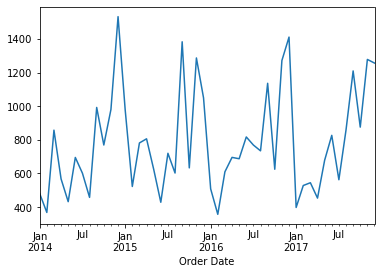

In [29]:
y.plot()
plt.show()

In [30]:
# Cheking for Stationarity
# Augmented Dickey- Fuller( ADF) test
# Null hypothesis is that data is not stationary 
from pandas import Series 
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
result # t val, p val, lags, observations, CVs, MIC

(-5.1910701873392675,
 9.16875665566581e-06,
 10,
 37,
 {'1%': -3.6209175221605827,
  '5%': -2.9435394610388332,
  '10%': -2.6104002410518627},
 521.9616303121272)

In [31]:
# Decompose data into trend, sesonality and residual
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)


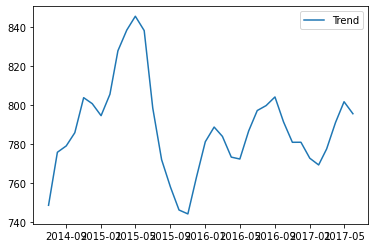

In [32]:
trend = decomposition.trend
plt.show()
plt.plot(trend,label ="Trend")
plt.legend(loc = "best")

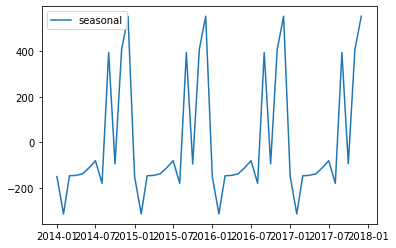

In [33]:
seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal,label ="seasonal")
plt.legend(loc = "best")

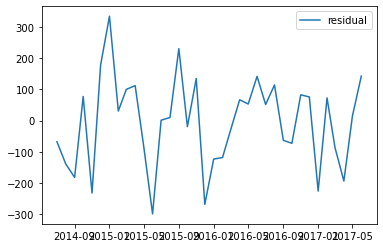

In [34]:
residual = decomposition.resid
plt.show()
plt.plot(residual,label ="residual")
plt.legend(loc = "best")

In [35]:

# Forecasting :- ARIMA
p = d = q = range(0,2)

pdq = list(itertools.product(p,d,q))

seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

print(pdq)
print(seasonal_pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


In [36]:
print('SARIMAX :{}x{}'.format(pdq[1],seasonal_pdq[1]))

SARIMAX :(0, 0, 1)x(0, 0, 1, 12)


In [37]:
from pylab import rcParams
for param in pdq :
    for param_seasonal in seasonal_pdq:
        try :
            mod = sm.tsa.statespace.SARIMAX(y,order = param, 
seasonal_order = param_seasonal,
enforce_stationarity = False ,
enforce_invertibility = False)
            results = mod.fit()
            print("ARIMA{}x{}12 - AIC :{}".format(param,param_seasonal,results.aic))
        except :
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC :769.0817523205915


C:\Users\Sharmila\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC :969.5460273168826
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC :477.7170130919702
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC :302.27028999297534
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC :497.2314433418337


C:\Users\Sharmila\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC :647.243175344255
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC :318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC :304.2488280367299
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC :720.9252270758102


C:\Users\Sharmila\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC :2709.666827006174
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC :466.56074298091437
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC :291.626138967302


C:\Users\Sharmila\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC :499.5468134929265


C:\Users\Sharmila\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC :2631.9538927674575
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC :319.98848769277635
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC :291.87255765307935
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC :677.894766843944


C:\Users\Sharmila\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC :1587.9375247816392
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC :486.63785672274247
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC :304.9671228171492
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC :497.78896630044073


C:\Users\Sharmila\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC :720.4098763381887
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC :319.7714068109212
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC :306.9113200215131
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC :649.9056176709446


C:\Users\Sharmila\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC :2547.8774516799194
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC :458.8705548484068
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC :279.5806231715478
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC :486.1832977439812


C:\Users\Sharmila\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC :2568.7042268610144
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC :310.75743684169333
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC :281.557662150667
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC :692.1645522067712


C:\Users\Sharmila\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC :1068.6742199397377
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC :479.46321478521355
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC :304.20776751651505
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC :480.92593679354013


C:\Users\Sharmila\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC :1069.2639470059985
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC :304.46646750656583
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC :304.58426921872996
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC :665.7794442579227


C:\Users\Sharmila\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC :nan
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC :468.3637985658761
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC :293.3422194967349
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC :482.5763324070518


C:\Users\Sharmila\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC :2570.569227952612
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC :304.37537863964087
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC :293.75131882898125
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC :671.2513547541902


C:\Users\Sharmila\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC :1296.4093861332065
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC :479.20034222811347
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC :300.2130611614422
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC :475.34036585859474
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC :1780.857425288417
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC :300.6270901312165
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC :302.32649925922993
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC :649.0318019776424
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC :2559.4602359435753
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC :460.4762687397542
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC :281.3873006930346
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC :469.5250354658564
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC :29756983.909029685
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC :297.78754398584664
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC :283.36610149645907


In [38]:
# Fitting final model
mod = sm.tsa.statespace.SARIMAX(y, order = (1,1,1),seasonal_order = (1, 1, 1, 12),
                                enforce_stationarity = False ,
                                enforce_invertibility = False)

results = mod.fit()
print(results.summary().tables[1])        

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0949      0.313     -0.303      0.762      -0.708       0.518
ma.L1         -1.0000      0.415     -2.409      0.016      -1.813      -0.187
ar.S.L12      -0.0036      0.422     -0.008      0.993      -0.831       0.824
ma.S.L12      -0.3011      0.500     -0.602      0.547      -1.281       0.679
sigma2      2.476e+04   1.68e-05   1.48e+09      0.000    2.48e+04    2.48e+04


In [39]:
# Fitting final model
mod = sm.tsa.statespace.SARIMAX(y, order = (1,1,1),seasonal_order = (0, 1, 1, 12),
                                enforce_stationarity = False ,
                                enforce_invertibility = False)

results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0953      0.310     -0.307      0.759      -0.703       0.513
ma.L1         -1.0000      0.414     -2.417      0.016      -1.811      -0.189
ma.S.L12      -0.3049      0.172     -1.777      0.076      -0.641       0.031
sigma2      2.476e+04   1.67e-05   1.48e+09      0.000    2.48e+04    2.48e+04


            lower Sales  upper Sales
Order Date                          
2017-01-01   333.196310   969.590777
2017-02-01   117.675801   753.855792
2017-03-01   364.533817   999.590981
2017-04-01   422.796101  1056.858181
2017-05-01   364.201022   997.372040
2017-06-01   407.300431  1039.669011
2017-07-01   427.106467  1058.748634
2017-08-01   384.976749  1015.958211
2017-09-01   853.134893  1483.512828
2017-10-01   330.459383   960.283851
2017-11-01   931.606855  1560.921953
2017-12-01  1044.511251  1673.355059


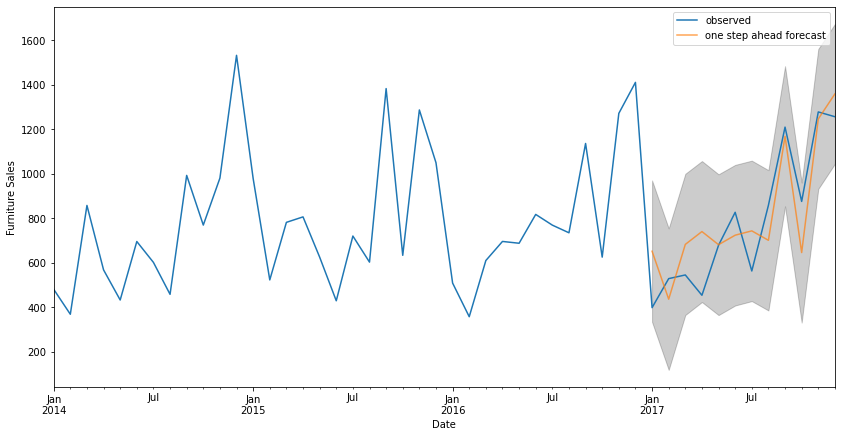

In [40]:
# Validating Forecasts
pred = results.get_prediction(start = pd.to_datetime("2017-01-01"))
pred_ci = pred.conf_int()
print(pred_ci)
ax = y["2014":].plot(label = "observed")
pred.predicted_mean.plot(ax= ax,label = "one step ahead forecast", alpha = .7, figsize = (14,7) )
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0],pred_ci.iloc[:,1],color = "k",alpha = .2)
ax.set_xlabel("Date")
ax.set_ylabel("Furniture Sales")
plt.legend()
plt.show()

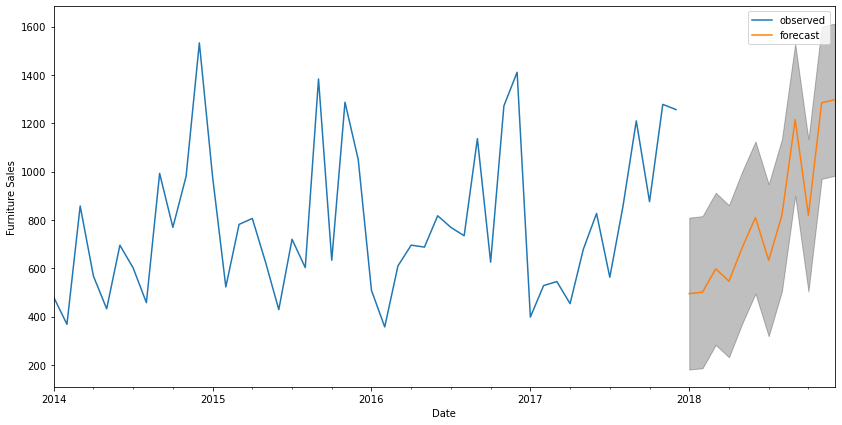

In [41]:
pred_uc = results.get_forecast(steps = 12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label = "observed", figsize = (14,7))
pred_uc.predicted_mean.plot(ax= ax,label = "forecast")

ax.fill_between(pred_ci.index, pred_ci.iloc[:,0],pred_ci.iloc[:,1],color = "k", alpha = .25)
ax.set_xlabel("Date")
ax.set_ylabel("Furniture Sales")
plt.legend()
plt.show()

In [44]:
pred_uc.predicted_mean

2018-01-01     495.018322
2018-02-01     500.608377
2018-03-01     597.361022
2018-04-01     546.128143
2018-05-01     685.385125
2018-06-01     809.614615
2018-07-01     632.803608
2018-08-01     819.438628
2018-09-01    1214.741792
2018-10-01     818.378133
2018-11-01    1284.407476
2018-12-01    1297.348828
Freq: MS, dtype: float64

In [42]:
y

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049187
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2